In [23]:
import torch
import numpy
import random
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt 
 
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x+1
x,y = Variable(x),Variable(y)
plt.ion()


In [24]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        #两层感知机
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
 
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
 
net = Net(1,8,1)  #输入节点1个，隐层节点8个，输出节点1个
optimizer = torch.optim.SGD(net.parameters(),lr = 0.2)
loss_func = torch.nn.MSELoss()
 


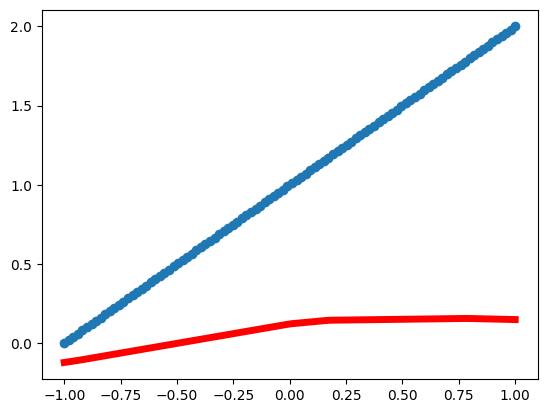

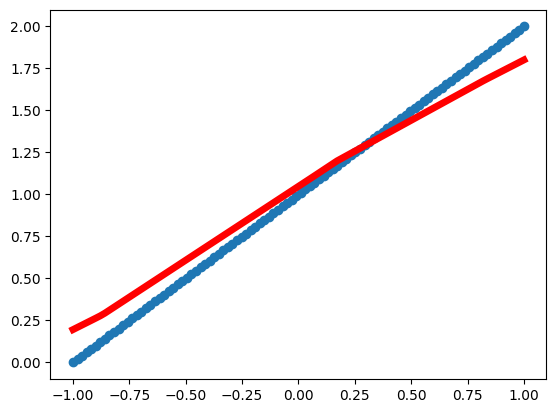

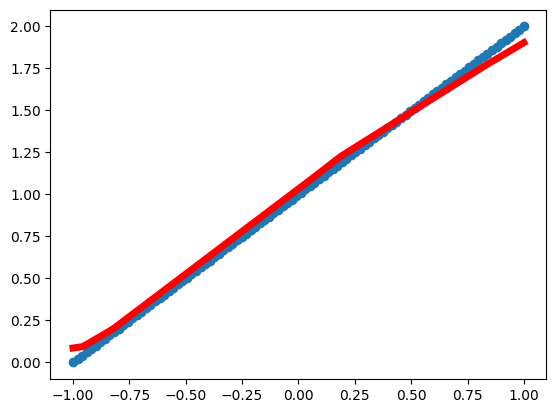

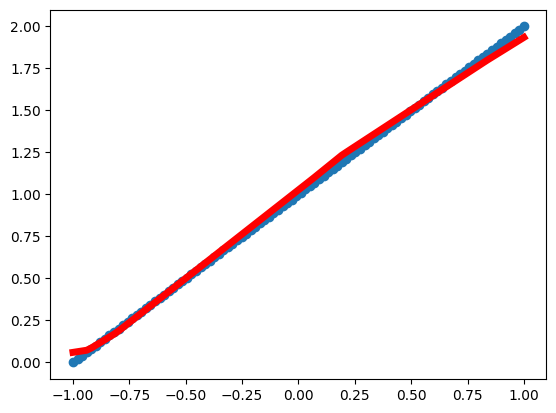

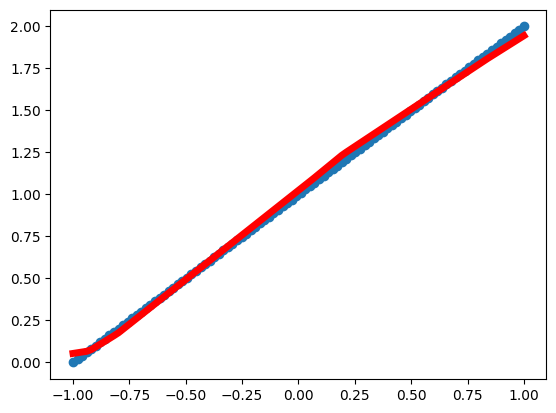

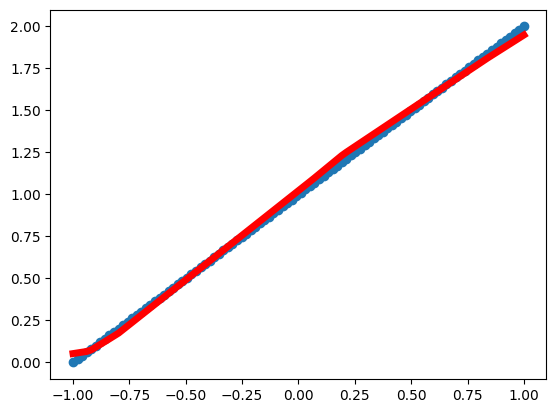

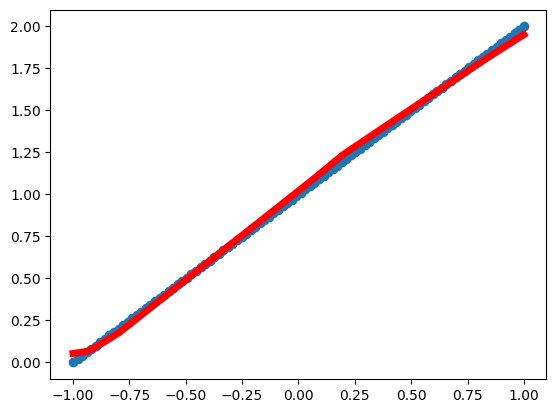

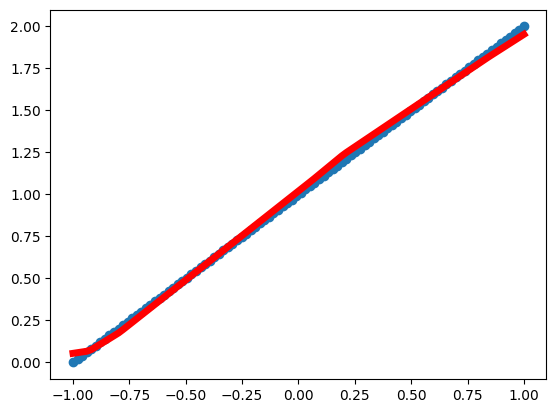

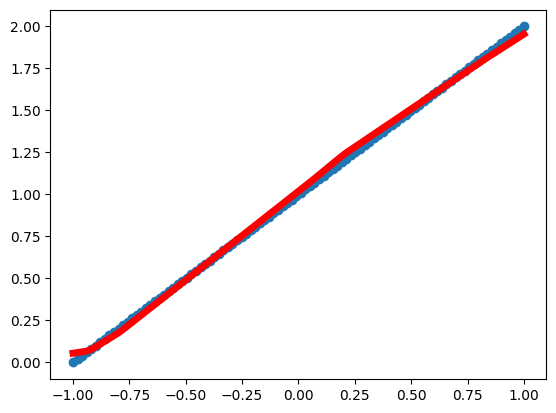

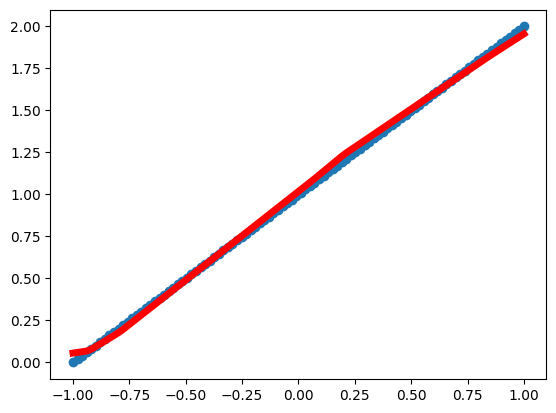

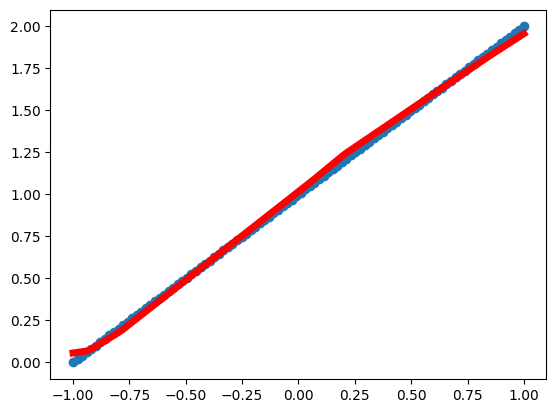

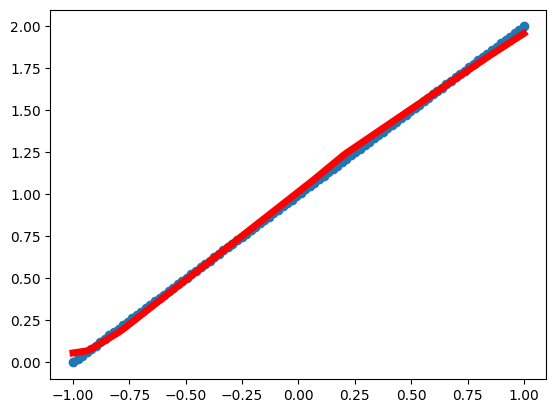

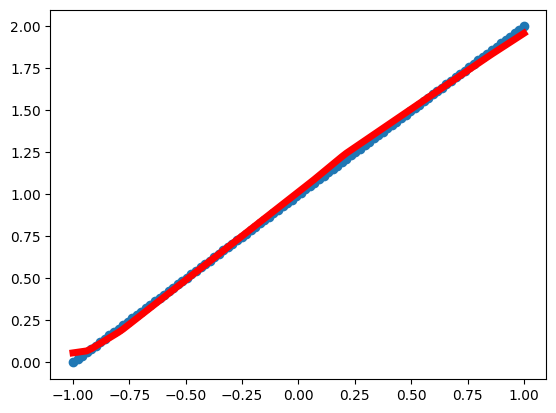

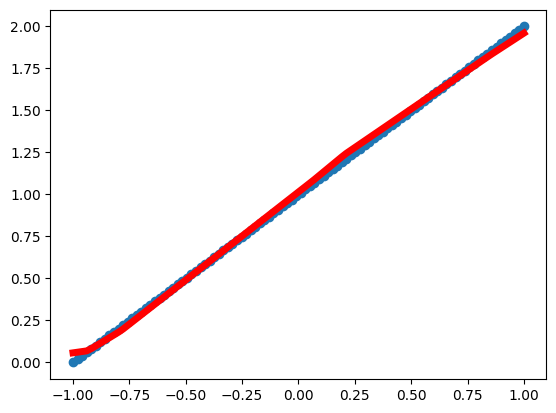

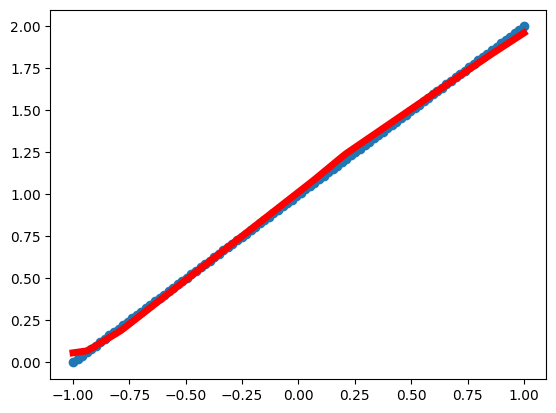

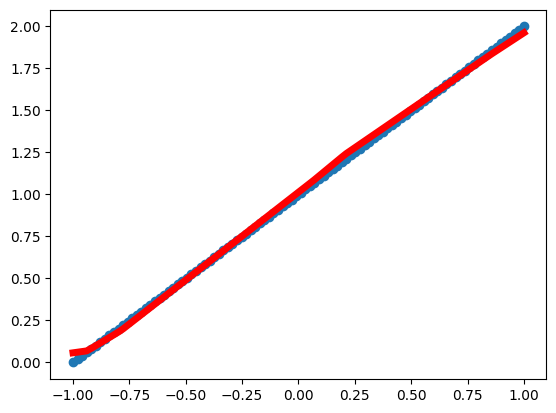

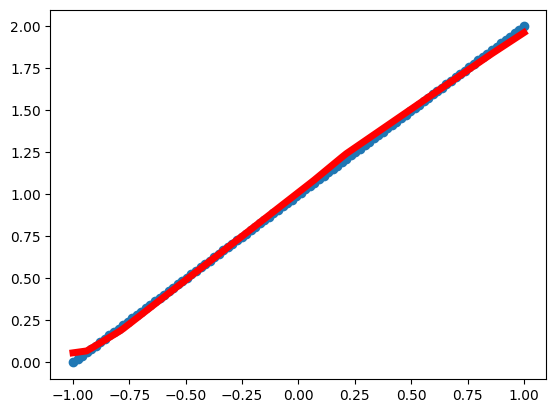

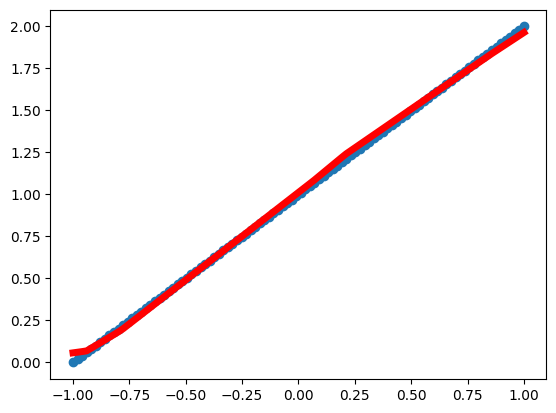

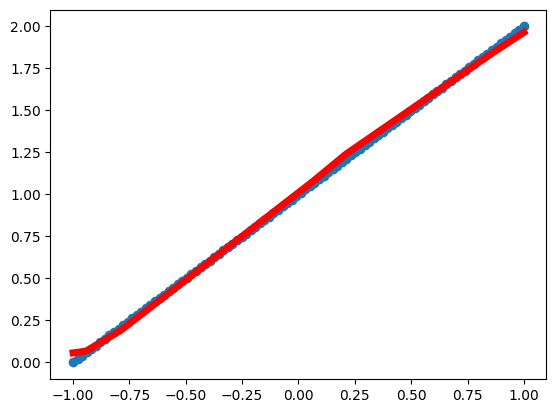

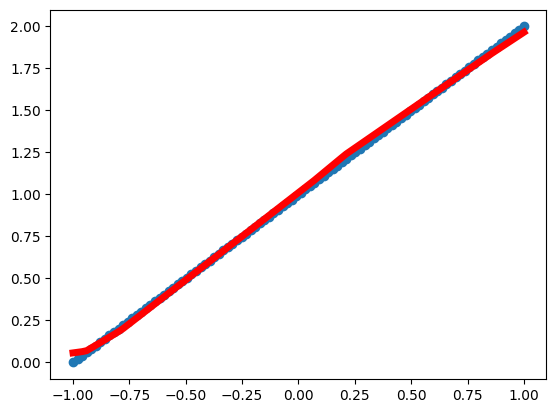

In [25]:
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.pause(0.1)
 
plt.ioff()
plt.show()